In [5]:
import numpy as np

In [6]:
import datetime

In [7]:
def mjd_to_date(mjds):
    """Convert Modified Julian Day (MJD) to the year, month, day.

        Input:
            mjds: Array of Modified Julian days

        Outputs:
            years: Array of years.
            months: Array of months.
            days: Array of (fractional) days.

        (Follow Jean Meeus' Astronomical Algorithms, 2nd Ed., Ch. 7)
    """
    JD = np.atleast_1d(mjds)+2400000.5

    if np.any(JD<0.0):
        raise ValueError("This function does not apply for JD < 0.")

    JD += 0.5

    # Z is integer part of JD
    Z = np.floor(JD)
    # F is fractional part of JD
    F = np.mod(JD, 1)

    A = np.copy(Z)
    alpha = np.floor((Z-1867216.25)/36524.25)
    A[Z>=2299161] = Z + 1 + alpha - np.floor(0.25*alpha)

    B = A + 1524
    C = np.floor((B-122.1)/365.25)
    D = np.floor(365.25*C)
    E = np.floor((B-D)/30.6001)

    day = B - D - np.floor(30.6001*E) + F
    month = E - 1
    month[(E==14.0) | (E==15.0)] = E - 13
    year = C - 4716
    year[(month==1.0) | (month==2.0)] = C - 4715
    return (year.astype('int').squeeze(), month.astype('int').squeeze(), \
                day.squeeze())

In [8]:
print (mjd_to_date(58849))

(array(2020), array(1), array(1.0))


In [9]:
x = datetime.datetime(2020, 5, 17)
print (x)

2020-05-17 00:00:00


In [10]:
def mjd_to_datetime(mjd):
    """Given an MJD return a datetime.datetime object.
        
        Input:
            mjds: Array of Modified Julian days

        Output:
            date: The datetime object.
    """
    yy, mm, dd = mjd_to_date(mjd)
    date = datetime.datetime(int(yy), int(mm), int(dd))   + \
            datetime.timedelta(days=(mjd%1))
    return date


In [11]:
print (mjd_to_datetime(58849.3))

2020-01-01 07:12:00


In [12]:
from astropy.time import Time

In [13]:
times = mjd_to_datetime(58849)

In [14]:
print (times)

2020-01-01 00:00:00


In [15]:
date = datetime.date(2019,1,13)
print (date)

2019-01-13


In [16]:
x_time=[58849, 58859, 58869, 58879]
y_flux=[1.2, 1.4, 1.5, 1.3]

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

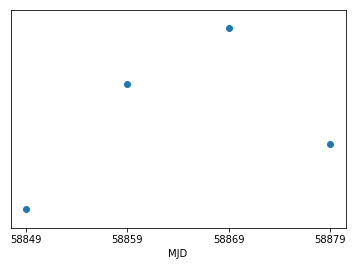

In [18]:
fig1, ax1 = plt.subplots()


ax1.scatter(x_time,y_flux)

x_formatter = ticker.ScalarFormatter(useOffset=False)
ax1.xaxis.set_major_formatter(x_formatter)

#Arrange the position of x axis ticks
plt.xticks(np.arange(min(x_time), max(x_time)+1, 10.0))
#plt.yticks(np.arange(min(y_flux),max(y_flux), 0.1))

plt.xlabel('MJD')
ax1.set_yscale('log')

plt.show()

In [19]:
import psrchive

In [20]:
import subprocess

In [21]:
import os
import os.path

In [22]:
command = os.popen("ls")
print (command.read())

Fundi_tutorial.ipynb
Untitled.ipynb
Untitled1.ipynb
atnf.csv



In [23]:
bashCommand = "find . -name *txt"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print (str(output)   )
print (error)


None


In [24]:
command = os.popen('find . -name *txt')
print(command.read())
print(command.close())


None


In [25]:
import sys
import types

def execute(cmd, stdout=subprocess.PIPE, stderr=sys.stderr, dir=None):
    """Execute the command 'cmd' after logging the command
        to STDOUT. Execute the command in the directory 'dir',
        which defaults to the current directory is not provided.

        Output standard output to 'stdout' and standard
        error to 'stderr'. Both are strings containing filenames.
        If values are None, the out/err streams are not recorded.
        By default stdout is subprocess.PIPE and stderr is sent 
        to sys.stderr.

        Returns (stdoutdata, stderrdata). These will both be None, 
        unless subprocess.PIPE is provided.
    """
    # Log command to stdout
    #print_debug("'%s'" % cmd, 'syscalls', stepsback=2)

    stdoutfile = False
    stderrfile = False
    if type(stdout) == str:
        stdout = open(stdout, 'w')
        stdoutfile = True
    if type(stderr) == str:
        stderr = open(stderr, 'w')
        stderrfile = True

    # Run (and time) the command. Check for errors.
    if type(cmd) == str:
        shell=True
    else:
        shell=False

    pipe = subprocess.Popen(cmd, shell=shell, cwd=dir, \
                            stdout=stdout, stderr=subprocess.PIPE)
    (stdoutdata, stderrdata) = pipe.communicate()

    # Close file objects, if any
    if stdoutfile:
        stdout.close()
    if stderrfile:
        stderr.write(stderrdata)
        stderr.close()

    retcode = pipe.returncode
    if retcode < 0:
        raise errors.SystemCallError("Execution of command (%s) " \
                                    "terminated by signal (%s)!" % \
                                (cmd, -retcode))
    elif retcode > 0:
        raise errors.SystemCallError("Execution of command (%s) failed " \
                                "with status (%s)!\nError output:\n%s" % \
                                (cmd, retcode, stderrdata))
    else:
        # Exit code is 0, which is "Success". Do nothing.
        pass

    return (stdoutdata, stderrdata)

In [42]:
# Import psrchive

In [43]:
# Astropy

In [44]:
# Fitting a model to data